In [4]:
from tensorflow.keras.datasets.imdb import load_data
(x_data,y_data),(tt_x,tt_y)=load_data(num_words=500)#500으로 끊어서 가져온다.
x_data.shape

17473536/17464789 [==============================] - 0s 0us/step


(25000,)

In [5]:
x_data[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [6]:
len(x_data[0]),len(x_data[1])

(218, 189)

In [7]:
y_data[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

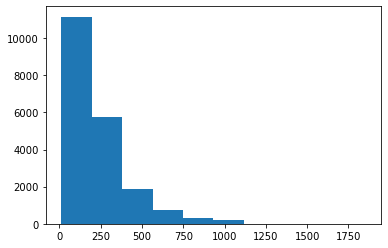

In [14]:
import numpy as np
l= np.array([len(i)for i in t_x])
import matplotlib.pyplot as plt
plt.hist(l)

In [15]:
np.median(l)#중간값

178.0

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences#정리해주는 목적 정형화된 자료이고 순차적데이터
s_t_x=pad_sequences(t_x,maxlen=100)#데이터마다 값이 달라수가다른것들을 데이터 크기사이즈를 맞춰줌/ 앞내용은 삭제되고 뒷내용만 남음

In [20]:
s_t_x.shape

(20000, 100)

In [22]:
s_v_x=pad_sequences(v_x,maxlen=100)

In [24]:
from tensorflow import keras
m = keras.Sequential()#모델객체생성

In [26]:
#레이어층 추가/ 레이어층이므로 은닉층포함한 레이어
m.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
m.add(keras.layers.Dense(1,activation='sigmoid'))

In [27]:
t_ho=keras.utils.to_categorical(s_t_x)#가변작업 가변된 트레이닝 데이터-> 데이터마다 값이 달라수가다른것들을 데이터 크기사이즈를 맞춰줌
t_ho.shape#원핫인코딩작업으로 맞춰줌

(20000, 100, 500)

In [28]:
v_ho=keras.utils.to_categorical(s_v_x)
v_ho.shape#범주형데이터

(5000, 100, 500)

In [29]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [32]:
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5',save_best_only=True)
e_stopping=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
hy=m.fit(t_ho,t_y,epochs=100,batch_size=64,validation_data=(v_ho,v_y),callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 10s 28ms/step - loss: 0.6996 - accuracy: 0.4981 - val_loss: 0.6972 - val_accuracy: 0.4962
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6950 - accuracy: 0.5119 - val_loss: 0.6937 - val_accuracy: 0.5082
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6867 - accuracy: 0.5490 - val_loss: 0.6826 - val_accuracy: 0.5640
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6746 - accuracy: 0.5960 - val_loss: 0.6722 - val_accuracy: 0.5972
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6607 - accuracy: 0.6297 - val_loss: 0.6584 - val_accuracy: 0.6312
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6443 - accuracy: 0.6576 - val_loss: 0.6429 - val_accuracy: 0.6538
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6274 - accuracy: 0.6822 - val_loss: 0.6285 - val_accuracy

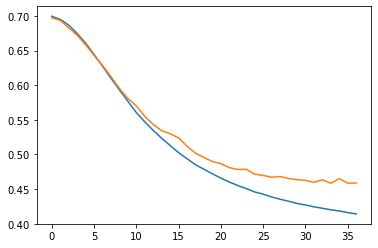

In [34]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [37]:
m1 = keras.Sequential()
m1.add(keras.layers.Embedding(500,16,input_length=100))#500회,데이터를 16정도로 바꿔줌,데이터의 길이
m1.add(keras.layers.SimpleRNN(8))
m1.add(keras.layers.Dense(1,activation='sigmoid'))

ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m1.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.emd5',save_best_only=True)
e_stopping=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
hy=m1.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_y),callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6955 - accuracy: 0.4942 - val_loss: 0.6945 - val_accuracy: 0.4940
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6920 - accuracy: 0.5172 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6893 - accuracy: 0.5422 - val_loss: 0.6895 - val_accuracy: 0.5424
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6806 - accuracy: 0.5929 - val_loss: 0.6781 - val_accuracy: 0.6092
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6643 - accuracy: 0.6539 - val_loss: 0.6614 - val_accuracy: 0.6584
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6445 - accuracy: 0.6945 - val_loss: 0.6447 - val_accuracy: 0.6830
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6250 - accuracy: 0.7175 - val_loss: 0.6307 - val_accuracy:

Epoch 32/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4010 - accuracy: 0.8306 - val_loss: 0.4660 - val_accuracy: 0.7852
Epoch 33/100
313/313 [==============================] - 4s 14ms/step - loss: 0.3984 - accuracy: 0.8310 - val_loss: 0.4659 - val_accuracy: 0.7828
Epoch 34/100
313/313 [==============================] - 5s 15ms/step - loss: 0.3959 - accuracy: 0.8330 - val_loss: 0.4671 - val_accuracy: 0.7838


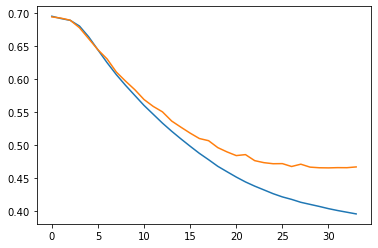

In [38]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [39]:
t_x,v_x,t_y,v_y=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
(x_data,y_data),(tt_x,tt_y)=load_data(num_words=500)

In [40]:
s_t_x=pad_sequences(t_x,maxlen=100)
s_v_x=pad_sequences(v_x,maxlen=100)

In [46]:
m2 = keras.Sequential()
m2.add(keras.layers.Embedding(500,16,input_length=100))#전처리층
m2.add(keras.layers.LSTM(8,dropout=0.3))#학습된 레이어층
m2.add(keras.layers.Dense(1,activation='sigmoid'))

ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m2.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_LSTM.h5',save_best_only=True)
e_stopping=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
hy2=m2.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_y),callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6928 - accuracy: 0.5268 - val_loss: 0.6923 - val_accuracy: 0.5968
Epoch 2/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6912 - accuracy: 0.5956 - val_loss: 0.6897 - val_accuracy: 0.6148
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6856 - accuracy: 0.6256 - val_loss: 0.6781 - val_accuracy: 0.6450
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6597 - accuracy: 0.6880 - val_loss: 0.6388 - val_accuracy: 0.7180
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6199 - accuracy: 0.7267 - val_loss: 0.6043 - val_accuracy: 0.7348
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5943 - accuracy: 0.7372 - val_loss: 0.5803 - val_accuracy: 0.7516
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5685 - accuracy: 0.7538 - val_loss: 0.5561 - val_accurac

In [ ]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [ ]:
#컴벌루션 네트워크 ->데이터 특징을 잘뽑아냄
#RNN은 이전과 이후의 데이터에 영향을 끼침 연속적인 관련성을 포함시키는것 ,순환적인 특성을 토대로 이전의 데이터의 영향력을 유지시는 학습
#단점 단기기억
m3 = keras.Sequential()
m3.add(keras.layers.Embedding(500,16,input_length=100))#전처리층
m3.add(keras.layers.GRU(8,dropout=0.3))#학습된 레이어층
m3.add(keras.layers.Dense(1,activation='sigmoid'))

#가중치 갱신방법 옵티마이저
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m3.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_LSTM.h5',save_best_only=True)
e_stopping=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
hy3=m3.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_y),callbacks=[ck_p,e_stopping])